In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import sklearn
import keras
import torch
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [39]:
#df = pd.read_csv('synthetic_data.csv')
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])

df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 1.2,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0


In [40]:
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 1.2,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0


In [41]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 0
    else:
        return 1

In [42]:
Output = df.apply(pin_update, axis=1)
df['Output'] = Output
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0,1
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0,1
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0,0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0,1


In [43]:
df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Pan 1',
          'Total Row Score A', 
          'Anteroposterior 1.1',
          'Anteroposterior 2.1',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Pan 1.1',
          'Total Row Score B',
          'Output']]

df1.shape

(123, 17)

In [44]:
df1.iloc[1:, :]

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Pan 1,Total Row Score A,Anteroposterior 1.1,Anteroposterior 2.1,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Pan 1.1,Total Row Score B,Output
Center,,,,,,,,,,,,,,,,,
H,9.0,0.0,0.0,0.0,6.0,4.0,0.0,23,0.0,0.0,0.0,0.0,6.0,4.0,0.0,13,0
H,9.0,0.0,0.0,0.0,6.0,1.0,0.0,21,9.0,0.0,2.0,4.0,6.0,0.0,0.0,25,1
H,0.0,0.0,0.0,0.0,2.0,1.0,0.0,10,0.0,3.0,0.0,0.0,6.0,3.0,0.0,10,1
H,9.0,0.0,1.0,0.0,6.0,0.0,0.0,25,9.0,1.0,2.0,0.0,6.0,0.0,0.0,26,1
H,0.0,0.0,0.0,0.0,6.0,0.0,0.0,10,0.0,0.0,0.0,0.0,2.0,4.0,0.0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,3.0,0.0,23,9.0,0.0,0.0,0.0,6.0,3.0,0.0,21,0
Å,9.0,0.0,4.0,0.0,0.0,0.0,0.0,21,12.0,0.0,3.0,4.0,6.0,0.0,0.0,32,0
Å,12.0,0.0,0.0,0.0,6.0,0.0,0.0,25,9.0,0.0,0.0,0.0,6.0,0.0,0.0,23,1


In [45]:
x = np.array([df["Anteroposterior 1"], df["Anteroposterior 2"],df["Vertical 1"],df["Vertical 2"],df["Total Row Score A"],df["Total Row Score B"]]).T

y = np.array(df["Total Row Score C"]).T


In [46]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)


In [47]:
target_column = "Output"
numerical_column = df.columns.drop(target_column)
output_rows = df[target_column]
df.drop(target_column,axis=1,inplace=True)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=0)


In [49]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))


X_train: (92, 38)
y_train: (92,)
X_test: (31, 38)
y_test: (31,)


In [50]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(36,)))
basic_model.add(Dense(2, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)


In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(92, 38)
(92,)
(31, 38)
(31,)


In [52]:
#predicted = basic_model.predict(X_test)

In [53]:
# predicted = tf.squeeze(predicted)
# predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
# actual = np.array(y_test)
# conf_mat = confusion_matrix(actual, predicted)
# displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
# displ.plot()


# Kun A-værdier! 

In [54]:
target_column = "Output"
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_70092/3048013620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(target_column,axis=1,inplace=True)


In [55]:
scaler = MinMaxScaler()
scaler.fit(df1)
t_df1 = scaler.transform(df1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(t_df1, output_rows, test_size=0.25, random_state=0)

In [56]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(92, 16)
(92,)
(31, 16)
(31,)


In [57]:
basic_model = Sequential()
basic_model.add(Dense(units=32, activation='relu', input_shape=(16,)))
basic_model.add(Dense(16, activation='relu'))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.01)



In [58]:
# earlystop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=20, mode='max')
# basic_model = Sequential()
# basic_model.add(Dense(1012, input_dim=9, activation = 'relu'))
# basic_model.add(Dropout(0.9))
# basic_model.add(Dense(512, activation='relu'))
# basic_model.add(Dropout(0.9))
# basic_model.add(Dense(128, activation='relu'))
# basic_model.add(Dropout(0.5))
# basic_model.add(Dense(32, activation='relu'))
# basic_model.add(Dense(1, activation='sigmoid'))
# adam_opt = tf.keras.optimizers.legacy.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# basic_model.compile(loss='binary_crossentropy', optimizer=adam_opt, metrics=['accuracy'])


In [59]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
basic_model.fit(X_train1, y_train1, epochs=1)


2024-03-20 09:37:37.095255: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


KeyboardInterrupt: 

In [ ]:
loss_and_metrics1 = basic_model.evaluate(X_test1, y_test1)
print(loss_and_metrics1)
print('Loss = ',loss_and_metrics1[0])
print('Accuracy = ',loss_and_metrics1[1])

1/1 [==============================] - 1s 1s/step - loss: 0.6580 - accuracy: 0.5161
[0.6579524874687195, 0.5161290168762207]
Loss =  0.6579524874687195
Accuracy =  0.5161290168762207


In [ ]:
pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
X_train1, X_test1, y_train1, y_test1 = train_test_split(t_df1, output_rows, test_size=0.25, random_state=0)



In [ ]:
predicted = basic_model.predict(X_test1)

1/1 [==============================] - 0s 77ms/step


tf.Tensor(
[0.44742727 0.5362299  0.5344102  0.53774613 0.5360488  0.51053625
 0.4356996  0.50357115 0.47635663 0.5482764  0.5146332  0.56178993
 0.73866934 0.48476276 0.49395788 0.4977573  0.47679824 0.5436639
 0.5049277  0.76455617 0.45588616 0.71522653 0.5058173  0.7383189
 0.46205753 0.5757216  0.55202866 0.4755554  0.57800597 0.5091419
 0.54573077], shape=(31,), dtype=float32)


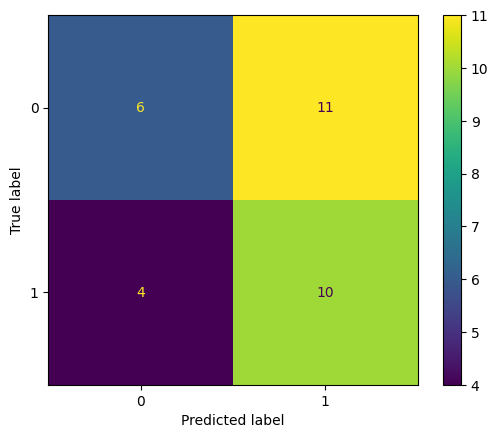

In [ ]:
predicted = tf.squeeze(predicted)
print(predicted)
predicted = np.array([0 if x <= 0.5 else 1 for x in predicted])
actual = np.array(y_test1)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [ ]:
def total_row_score(vector):
    vector[7] = sum(vector[0:7])
    vector[15] = sum(vector[8:15])
    print(vector)

In [ ]:
"Anteroposterior 1",'Anteroposterior 2','Vertical 1','Vertical 2','Transverse','Spacing','Pan 1','Total Row Score A','Goslon Score A'

          
'Anteroposterior 1.1','Anteroposterior 2.1','Vertical 1.1', 'Vertical 2.1', 'Transverse.1', 'Spacing.1', 'Pan 1.1', 'Total Row Score B', 'Goslon Score B'



xnew = np.array([12,0,2,6,1,0,6,0,  
                 12,0,2,6,1,0,6, 0])


total_row_score(xnew)

xnew.shape


[12  0  2  6  1  0  6 27 12  0  2  6  1  0  6 27]


(16,)

In [ ]:
prediction = basic_model.predict(xnew.reshape(1,16))
predicted = tf.squeeze(prediction)
print(predicted)
predicted = np.array([0 if predicted <= 0.5 else 1 ])
predicted

1/1 [==============================] - 0s 286ms/step
tf.Tensor(0.4589438, shape=(), dtype=float32)


array([0])

In [ ]:
from ctgan import CTGAN

In [ ]:
categoricals = ["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          'Pan 1',
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior 2.1',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 1.1',
          'Total Row Score B',]

ctgan = CTGAN(epochs=10)
ctgan.fit(df1, categoricals)

synthetic_iris = ctgan.sample(20000)
synthetic_iris.head()

ValueError: Invalid columns found: {'Tooth shape/size\r\n', 'Tooth shape/size\r\n.1'}

# test 


In [ ]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 1
    else:
        return 0

In [ ]:
def pin_update1(row):
     if 5 < row["Total Row Score C"] <= 16:
          return 1
     else:
          return 0 

In [ ]:
df_syn = pd.read_csv('synthetic_data.csv')
Output = df_syn.apply(pin_update, axis=1)
Output1 = df_syn.apply(pin_update1, axis=1)
#Output2 = df_syn.apply(pin_update2, axis=1)
df_syn['Output'] = Output
df_syn['Output1'] = Output1
#df_syn['Output2']  = Output2
df_syn
df1_syn = df_syn[["Anteroposterior 1",
          'Vertical 2',
          'Transverse',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Vertical 1.1',
          'Transverse.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1']]
df1_syn.iloc[1:, :]

target_column = ["Output","Output1"]
numerical_column = df1_syn.columns.drop(target_column)
output_rows_syn = df1_syn[target_column]
df1_syn.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1_syn)
df1_syn = scaler.transform(df1_syn)


X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(df1_syn, output_rows_syn, test_size=0.4,shuffle=True)

X_train_syn = np.array(X_train_syn)
X_test_syn = np.array(X_test_syn)
y_train_syn = np.array(y_train_syn)
y_test_syn = np.array(y_test_syn)


/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67805/855936983.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_syn.drop(target_column,axis=1,inplace=True)


In [ ]:
df1_syn.shape

(17810, 12)

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
import torch


In [ ]:
no_classes= 3
no_epochs = 10 
optimizer = Adam()
verbosity = 1
num_folds = 5
batch_size = 32
acc_per_fold = []
loss_per_fold = []
fold_no = 1

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=12, activation='relu'))
    #model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
    #model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
    #model.add(Dropout(0.4))
model.add(Dense(16,activation='relu'))
    #model.add(Dropout(0.4))
model.add(Dense(8,activation='relu'))
    #model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
 # Compile model
model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

model.fit(X_train_syn, y_train_syn, batch_size=batch_size,epochs=no_epochs, verbose=verbosity)

Epoch 1/10
334/334 [==============================] - 29s 74ms/step - loss: 0.8029 - accuracy: 0.4985
Epoch 2/10
334/334 [==============================] - 22s 67ms/step - loss: 0.8157 - accuracy: 0.4937
Epoch 3/10
334/334 [==============================] - 22s 65ms/step - loss: 3.3877 - accuracy: 0.4996
Epoch 4/10
334/334 [==============================] - 22s 66ms/step - loss: 12.4158 - accuracy: 0.4973
Epoch 5/10
334/334 [==============================] - 22s 65ms/step - loss: 39.5744 - accuracy: 0.5107
Epoch 6/10
334/334 [==============================] - 21s 63ms/step - loss: 78.3611 - accuracy: 0.5010
Epoch 7/10
334/334 [==============================] - 21s 64ms/step - loss: 214.5922 - accuracy: 0.4973
Epoch 8/10
334/334 [==============================] - 21s 64ms/step - loss: 456.9373 - accuracy: 0.4984
Epoch 9/10
334/334 [==============================] - 22s 67ms/step - loss: 789.7855 - accuracy: 0.5042
Epoch 10/10
334/334 [==============================] - 22s 67ms/step - lo

In [ ]:
model.evaluate(X_test_syn,y_test_syn, verbose=1)

189/189 [==============================] - 12s 61ms/step - loss: 0.5937 - accuracy: 0.6367


[0.5936639904975891, 0.6367096900939941]

In [ ]:
predicted = model.predict(X_test_syn)

189/189 [==============================] - 1s 2ms/step


tf.Tensor(
[[0.22870965 0.77129036]
 [0.2242299  0.77577007]
 [0.29021263 0.70978737]
 ...
 [0.16701551 0.8329845 ]
 [0.19734585 0.8026541 ]
 [0.20379014 0.79620993]], shape=(6042, 2), dtype=float32)


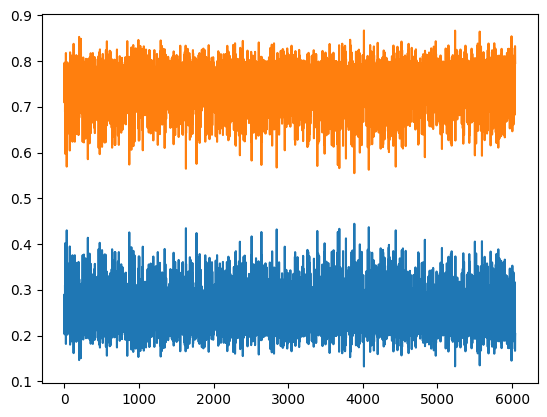

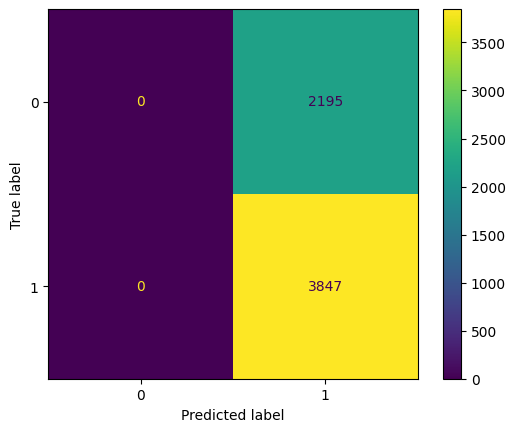

In [ ]:
predict = tf.squeeze(predicted)
plt.plot(predict)
print(predict)
predic= np.array([np.argmax(row) for row in predicted])
actual = np.array([np.argmax(row) for row in y_test_syn])
conf_mat = confusion_matrix(actual, predic)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
from sklearn import svm 

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df1)
t_df1 = scaler.transform(df1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(t_df1, output_rows, test_size=0.25, random_state=0)

In [ ]:
clf = svm.NuSVC(gamma="auto")
clf.fit(X_train1, y_train1)
X_train1.shape

(92, 17)

In [ ]:
predi = clf.predict(X_test1)

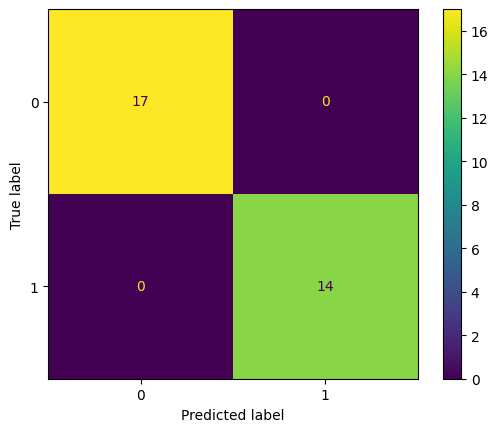

In [ ]:
expected = y_test
predicted = predi
conf_mat = confusion_matrix(expected, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [ ]:
xnew

array([12,  0,  2,  6,  1,  0,  6, 27, 12,  0,  2,  6,  1,  0,  6, 27])

In [ ]:
clf.predict([xnew])

ValueError: X has 16 features, but NuSVC is expecting 17 features as input.

In [147]:
def pin_update(row):
    if row["Total Row Score C"] <= 6:
        return 1
    else:
        return 0


def pin_update1(row):
     if 6 < row["Total Row Score C"]:
          return 1
     else:
          return 0 


def predic_func(pred):
    if pred[0] > pred[1]:
        return f"the estimate would be class 1 with a probability of {pred[0]*100}"
    else: 
        return f"The estimate would be class 2 with a probability of {pred[1]*100}"

In [170]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])
df.columns

Output = df.apply(pin_update, axis=1)
Output1 = df.apply(pin_update1, axis=1)
df['Output'] = Output
df['Output1'] = Output1


df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Crowding ',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Crowding .2',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1']]



df1 = df1.iloc[1:, :]

target_column = ["Output","Output1"]
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

X_train1, X_test1, y_train1, y_test1 = train_test_split(df1, output_rows, test_size=0.2,shuffle=True)

X_train1 = torch.tensor(X_train1.values,dtype=torch.float32)
y_train1 = torch.tensor(y_train1.values,dtype=torch.float32)
X_test1 = torch.tensor(X_test1.values,dtype=torch.float32)
y_test1 = torch.tensor(y_test1.values,dtype=torch.float32)

output_rows= torch.tensor(output_rows.values,dtype=torch.float32)
df1 = torch.tensor(df1.values,dtype=torch.float32)

In [163]:
df_syn = pd.read_csv('synthetic_data.csv')

Output = df_syn.apply(pin_update, axis=1)
Output1 = df_syn.apply(pin_update1, axis=1)
#Output2 = df_syn.apply(pin_update2, axis=1)
df_syn['Output'] = Output
df_syn['Output1'] = Output1
#df_syn['Output2']  = Output2
df_syn
df1_syn = df_syn[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Crowding ',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Crowding .2',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1']]

df1_syn.iloc[1:, :]

target_column = ["Output","Output1"]
numerical_column = df1_syn.columns.drop(target_column)
output_rows_syn = df1_syn[target_column]
df1_syn.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1_syn)
df1_syn = scaler.transform(df1_syn)


X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(df1_syn, output_rows_syn, test_size=0.25,shuffle=True)
np.median(df_syn['Total Row Score C'])

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_70092/3252993230.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_syn.drop(target_column,axis=1,inplace=True)


6.0

In [212]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define your neural network model
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(in_features=input_size, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Prepare your data (replace these placeholders with your actual data)
X_train = torch.tensor(X_train_syn,dtype=torch.float32)
y_train = torch.tensor(y_train_syn.values,dtype=torch.float32)
X_test = torch.tensor(X_test_syn,dtype=torch.float32)
y_test = torch.tensor(y_test_syn.values,dtype=torch.float32)

# Define hyperparameters
input_size = len(X_train[0])  # Input size based on the number of features
output_size = 2  # Output size (0-52)4

# Create DataLoader
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Initialize model, loss function, and optimizer
model = Classifier()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Evaluate the model
with torch.no_grad():
    model.eval()
    print(y_test1.shape)
    outputs = model(X_test1)
    _, predicted = torch.relu(outputs, -1)
    correct = (predicted.reshape(-1,1) == y_test1).sum().item()
    total = output_rows.size(0)
    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy:.2f}')
    print(predicted)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_70092/2192301457.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))


Epoch 1/10, Loss: 0.2391417908600007
Epoch 2/10, Loss: 0.22955180824488058
Epoch 3/10, Loss: 0.2292438797909638
Epoch 4/10, Loss: 0.22819861920400597
Epoch 5/10, Loss: 0.2272458427253811
Epoch 6/10, Loss: 0.22686684309751137
Epoch 7/10, Loss: 0.22590895236908703
Epoch 8/10, Loss: 0.22595120031258156
Epoch 9/10, Loss: 0.2258705937656863
Epoch 10/10, Loss: 0.2256482647068199
torch.Size([25, 2])


TypeError: relu() takes 1 positional argument but 2 were given

In [133]:
def total_row_score(vector):
    vector[9] = sum(vector[0:9])
    vector[19] = sum(vector[10:19])
    print(vector)

In [208]:
xnew = np.array([12, 0, 3, 0, 0, 6, 8, 0 ,3, 0,
                 0, 0, 3, 0, 0, 6 ,0, 0, 3, 0])

total_row_score(xnew)
xnew.shape

[12  0  3  0  0  6  8  0  3 32  0  0  3  0  0  6  0  0  3 12]


(20,)

In [209]:
def predict(model, input_data):
    """
    Predicts the classes for new input data using a PyTorch model.

    Args:
    - model: trained PyTorch model
    - input_data: tensor containing the input data
    
    Returns:
    - predictions: tensor containing the predicted classes
    """
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during inference
        outputs = model(input_data)
        _, predictions = torch.softmax(outputs, 0)
    return predictions

# Assuming xnew is your new input data

# Convert the list of lists to a PyTorch tensor
xnew_tensor = torch.tensor(xnew, dtype=torch.float32)

# Example usage:
# Assuming 'model' is your trained PyTorch model
predicted_classes = predict(model, xnew_tensor)

# Print the predicted classes probabilities

# Print the predicted classes



print("Predicted classes:", predicted_classes)

Predicted classes: tensor(0.7375)


In [241]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)  # Output size is 1 for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Applying sigmoid activation for binary classification
        return x

# Example usage:
# Define the input size and hidden size
input_size = len(X_train[0])  # Assuming input features have size 8
hidden_size = 2

# Create an instance of the model
model = BinaryClassifier(input_size, hidden_size)
print(model)  # Print the architecture of the model

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient tracking during inference
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(X_test)
        # Calculate loss
        loss = criterion(outputs, labels)
        # Update test loss
        test_loss += loss.item() * inputs.size(0)
        # Calculate accuracy
        _, predicted = torch.max(outputs, -1)
        correct += (predicted.reshape(-1,1) == y_test).sum().item()

# Calculate average test loss and accuracy
test_loss = test_loss / len(train_loader.dataset)

accuracy = correct  

print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}')


BinaryClassifier(
  (fc1): Linear(in_features=20, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=2, bias=True)
)
Epoch 1/10, Loss: 0.7297600239172749


/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_70092/4061959710.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))


Epoch 2/10, Loss: 0.6866699062544724
Epoch 3/10, Loss: 0.6698113166052719
Epoch 4/10, Loss: 0.6623573422431945
Epoch 5/10, Loss: 0.6569938676110629
Epoch 6/10, Loss: 0.6540083853677772
Epoch 7/10, Loss: 0.6524422378375613
Epoch 8/10, Loss: 0.6513335233447195
Epoch 9/10, Loss: 0.6505214870661155
Epoch 10/10, Loss: 0.6500441274423708


ValueError: Using a target size (torch.Size([32, 2])) that is different to the input size (torch.Size([4632, 2])) is deprecated. Please ensure they have the same size.

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_77106/3411591385.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.applications import HyperResNet


In [4]:
from kerastuner.applications import HyperResNet
from kerastuner.tuners import Hyperband

hypermodel = HyperResNet(input_shape=(32, 32, 3), classes=10)
tuner = Hyperband(
    hypermodel,
    objective='val_accuracy',
    max_epochs=100,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train_syn, y_train_syn, epochs=100, validation_data=(X_test_syn, y_test_syn))

NameError: name 'X_train_syn' is not defined